In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes
from sklearn.datasets import make_regression
from sklearn.datasets import load_iris

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [3]:
df= pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
df['Gender'].replace({'Male':0,"Female":1},inplace=True)

<ipython-input-12-50b9da59856c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Male':0,"Female":1},inplace=True)
<ipython-input-12-50b9da59856c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({'Male':0,"Female":1},inplace=True)


In [14]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [15]:
X=df.drop(columns=['User ID' ])
y=df['Purchased']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
x_train.shape

(320, 4)

In [28]:
y_train.shape

(320,)

In [38]:
clf=DecisionTreeClassifier(max_depth=3)

In [39]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [40]:
y_pred=clf.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[52,  0],
       [ 0, 28]])

[Text(0.5, 0.75, 'x[3] <= 0.5\ngini = 0.46\nsamples = 320\nvalue = [205, 115]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 205\nvalue = [205, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 115\nvalue = [0, 115]'),
 Text(0.625, 0.5, '  False')]

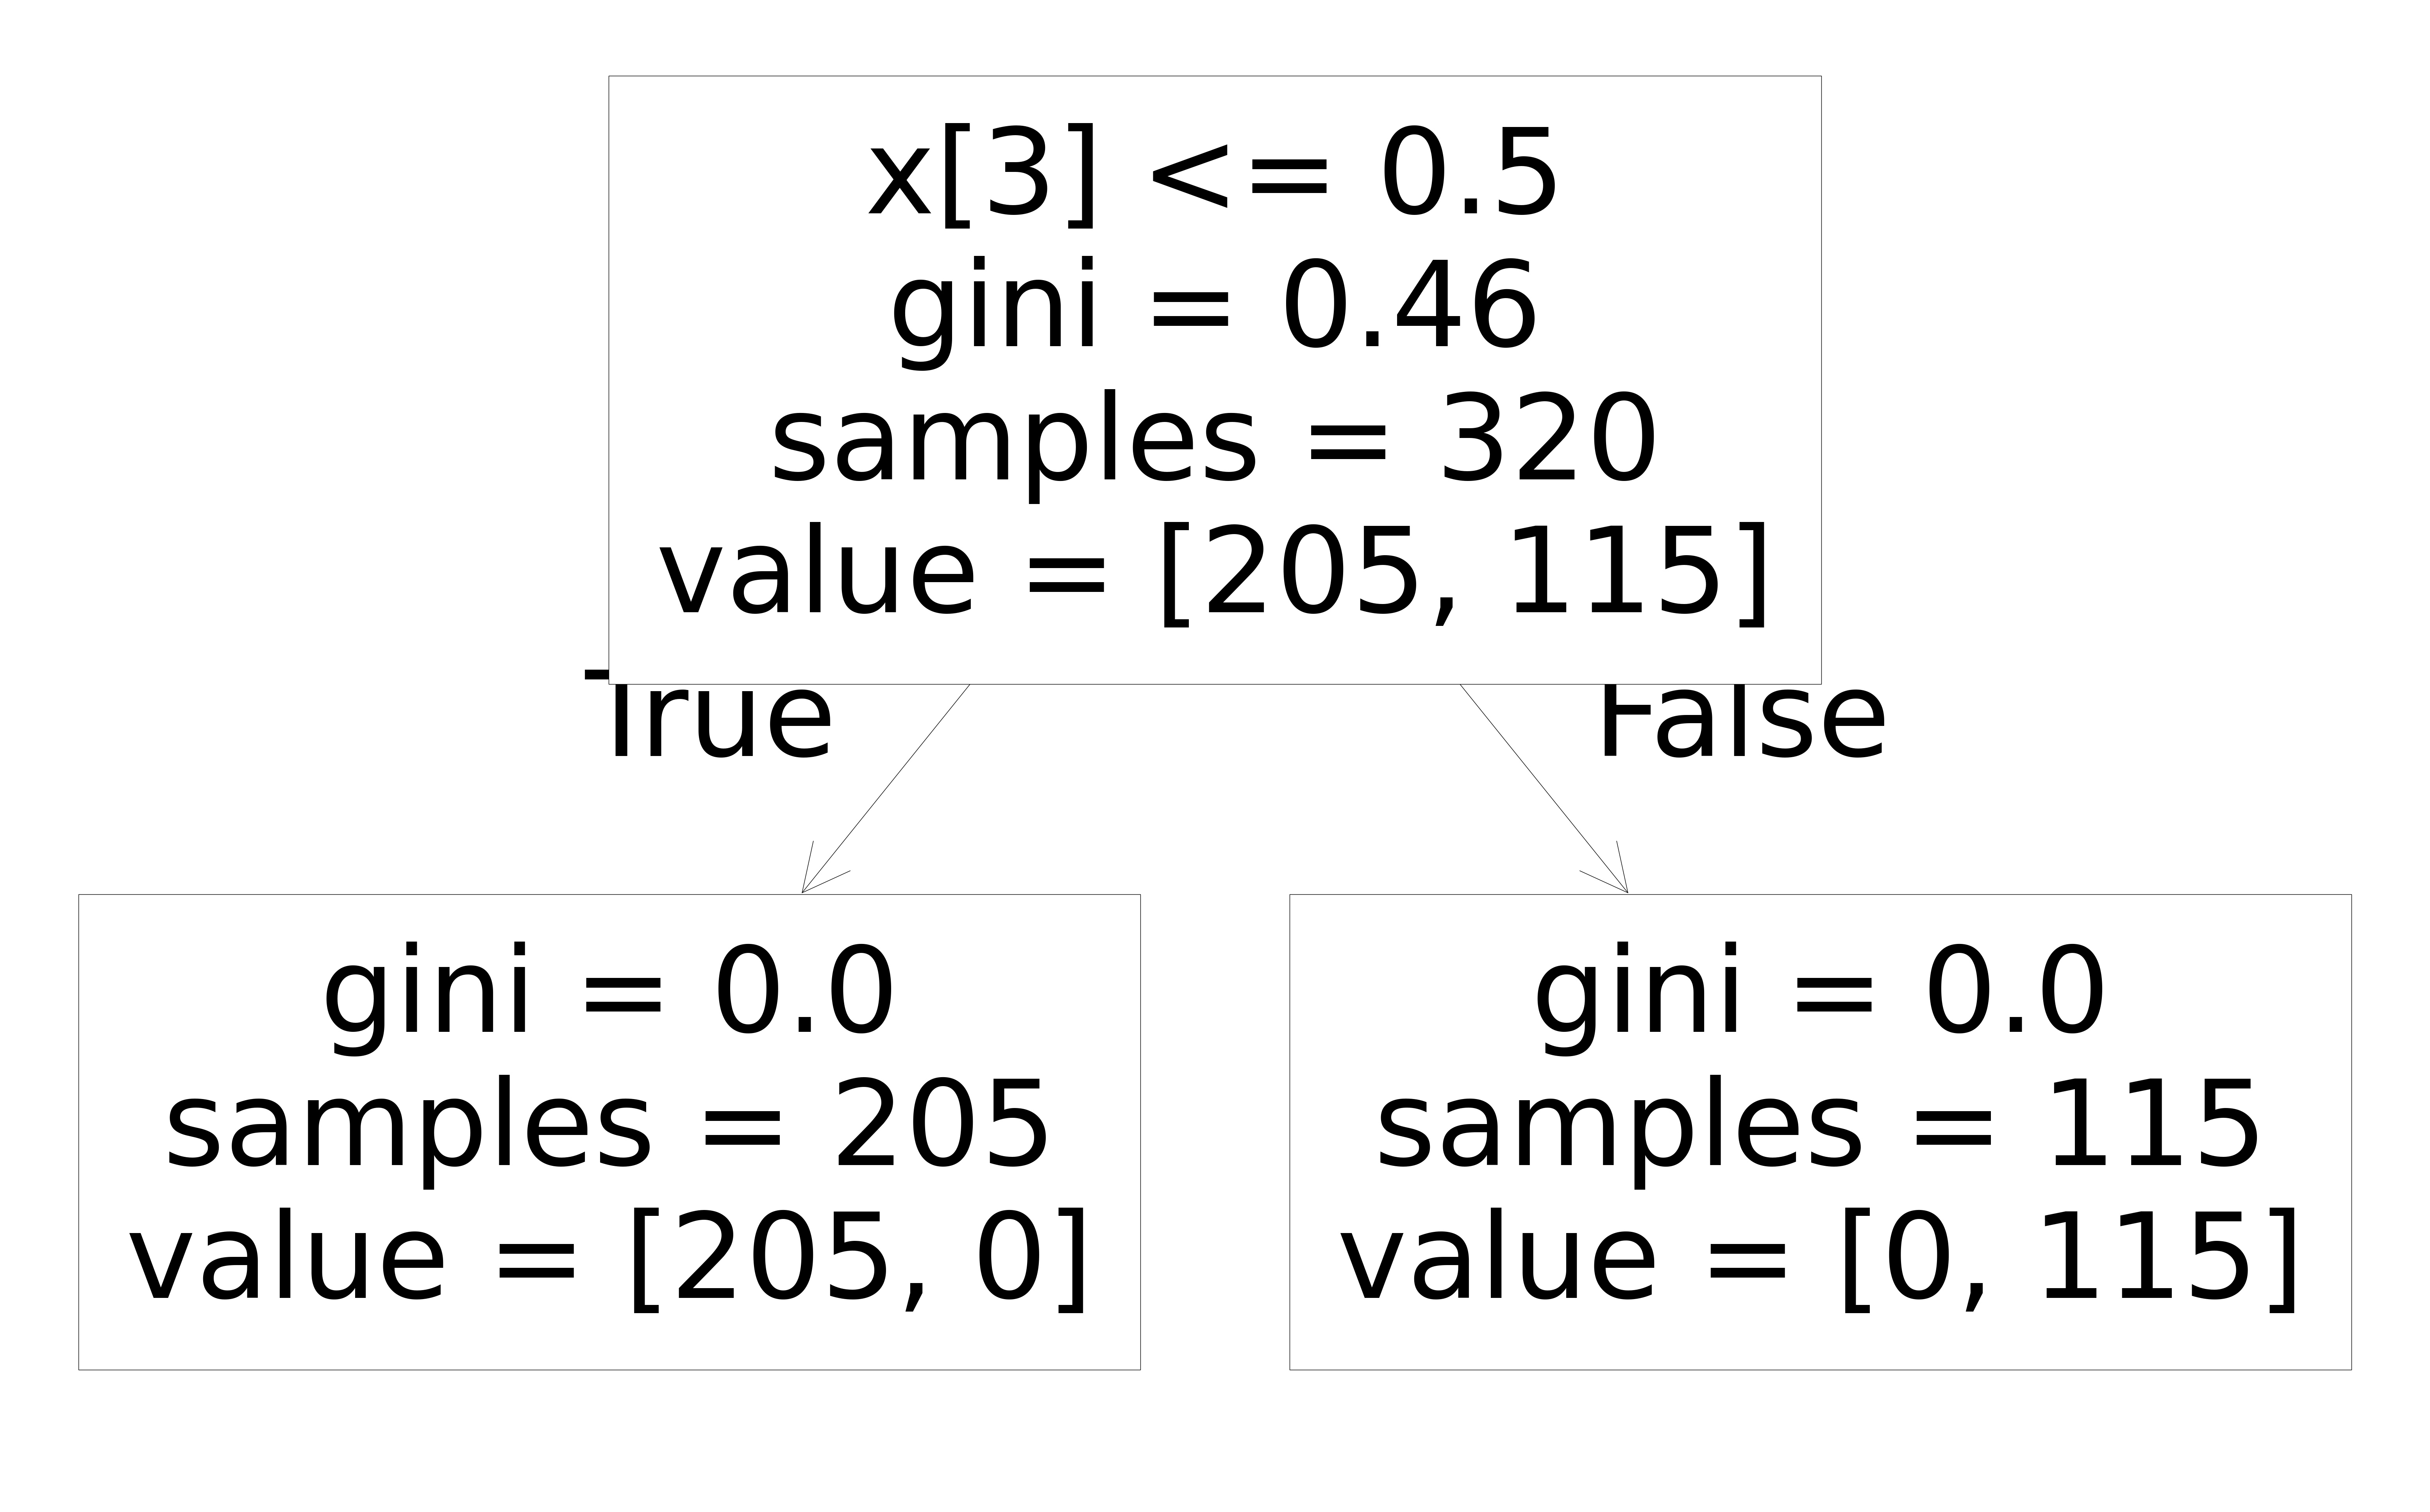

In [43]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=80,50

from sklearn.tree import plot_tree
plot_tree(clf)